In [1]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=b6ae839e6dbcdf705f226d907a8db50f7e22b76ae66ec03d5f74fe88a31b6cfe
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
!unzip dimensional_dataset.zip -d dimensional_dataset

Archive:  dimensional_dataset.zip
   creating: dimensional_dataset/content/dimensional_dataset/
  inflating: dimensional_dataset/content/dimensional_dataset/.part-00001-ba5921f9-3b0d-4009-b226-33c4efebcca3-c000.snappy.parquet.crc  
 extracting: dimensional_dataset/content/dimensional_dataset/_SUCCESS  
  inflating: dimensional_dataset/content/dimensional_dataset/part-00001-ba5921f9-3b0d-4009-b226-33c4efebcca3-c000.snappy.parquet  
  inflating: dimensional_dataset/content/dimensional_dataset/part-00000-ba5921f9-3b0d-4009-b226-33c4efebcca3-c000.snappy.parquet  
 extracting: dimensional_dataset/content/dimensional_dataset/._SUCCESS.crc  
  inflating: dimensional_dataset/content/dimensional_dataset/.part-00000-ba5921f9-3b0d-4009-b226-33c4efebcca3-c000.snappy.parquet.crc  


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Dimansional').getOrCreate()

In [9]:
df = spark.read.parquet('dimensional_dataset/content/dimensional_dataset')
df.show(5)

+--------------------+----------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------+
|             address|birth_date|        city_name|        country_name|               email|                 job|           person_id|         person_name|      phone_number|zip_code|
+--------------------+----------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------+
|25120 Williams Vi...|1955-04-04|      Hughesmouth|             Ukraine|veronicasmith@exa...|Holiday represent...|91997245-126b-41b...|        Ashley Allen|      701.806.3784|   84095|
|832 Hamilton Stra...|1979-01-15|       Debbieside|        South Africa|jasoncuevas@examp...|Television camera...|e58eb4e8-7d53-4bf...|Mrs. Christine Wi...|  279-975-4319x478|   26828|
|5872 Hines Point\...|1972-04-18|Lake Kathleenfort|             Albania|ben

In [8]:
df.count()

1000000

#Dataframe de pessoas

In [11]:
people_col = ['person_id', 'person_name', 'birth_date', 'email', 'phone_number', 'job']
people_df = df.select(*people_col).distinct()
people_df.show(5)

+--------------------+----------------+----------+--------------------+------------------+--------------------+
|           person_id|     person_name|birth_date|               email|      phone_number|                 job|
+--------------------+----------------+----------+--------------------+------------------+--------------------+
|b51b4223-dd02-465...|   Daniel Murphy|1959-03-28|  wjones@example.com|      534.881.7660|Sales promotion a...|
|dfb967b7-4bb9-421...|   Nicole Miller|1982-02-06| sarah56@example.com|291.490.3041x24946|Pharmacist, hospital|
|21dcad28-d714-49d...|     Donald Clay|1957-01-01|ronaldcollins@exa...|      605.326.9060|Building control ...|
|09d667e6-fcd0-4b3...|    Erin Jackson|1952-03-23|williamssummer@ex...|  001-708-671-0792|Brewing technologist|
|79a3bcb6-c1a0-46e...|Frederick Hebert|2001-01-05|  xallen@example.net|884.329.2125x96089|Conservation offi...|
+--------------------+----------------+----------+--------------------+------------------+--------------

#Dataframe de cidades

In [12]:
from pyspark.sql import functions as F

In [13]:
cities_col = ['city_name', 'zip_code', F.col('country_name').alias('country')]
cities_df = df.select(*cities_col).distinct()
cities_df.show(5)

+-------------------+--------+--------------------+
|          city_name|zip_code|             country|
+-------------------+--------+--------------------+
|        Heatherfurt|   22382|            Maldives|
|East Elizabethhaven|   66630|Libyan Arab Jamah...|
|        Johnsonberg|   99248|            Colombia|
|        Gloriaville|   08543|French Southern T...|
|       New Kristina|   58862|             Jamaica|
+-------------------+--------+--------------------+
only showing top 5 rows



#Dataframe Países

In [16]:
countries_df = df.selectExpr('country_name as country').distinct()
countries_df.show(5)

+--------------------+
|             country|
+--------------------+
|                Chad|
|            Anguilla|
|            Paraguay|
|               Macao|
|Heard Island and ...|
+--------------------+
only showing top 5 rows



#Dataframe Endereços

In [17]:
address_col = ['address', 'city_name', 'zip_code', 'country_name']
address_df = df.select(*address_col).distinct()
address_df.show(5)


+--------------------+-----------------+--------+--------------+
|             address|        city_name|zip_code|  country_name|
+--------------------+-----------------+--------+--------------+
|42482 Molly Circl...|   East Susanside|   31416|         Sudan|
|78590 Cook Burg\n...|         Maryberg|   14256|     Sri Lanka|
|57613 Amber Neck ...|       Lake Barry|   58910|Cayman Islands|
|86919 Moody Drive...|Lake Lindseyville|   02757|    Micronesia|
|45814 Orozco Ridg...|   Nataliechester|   57669|       Lebanon|
+--------------------+-----------------+--------+--------------+
only showing top 5 rows



#Dataframe Jobs

In [18]:
jobs_df = df.selectExpr('job').groupBy('job').count()
jobs_df.show(5)

+--------------------+-----+
|                 job|count|
+--------------------+-----+
|    Catering manager| 1609|
|Diplomatic Servic...| 1568|
|Designer, ceramic...| 1562|
| Retail merchandiser| 1530|
| Librarian, academic| 1539|
+--------------------+-----+
only showing top 5 rows



#Dataframe Idade

In [21]:
age_df = df.select('person_id', 'birth_date',
          F.when(F.year(F.current_date() ) - F.year(F.col('birth_date')) < 20, 'Under 20')
          .when (F.year(F.current_date() ) - F.year(F.col('birth_date')) < 40, '20 - 39')
          .when (F.year(F.current_date() ) - F.year(F.col('birth_date')) < 60, '40 - 59')
          .otherwise('60+').alias('age_group'))
age_df.show(5)

+--------------------+----------+---------+
|           person_id|birth_date|age_group|
+--------------------+----------+---------+
|91997245-126b-41b...|1955-04-04|      60+|
|e58eb4e8-7d53-4bf...|1979-01-15|  40 - 59|
|b0dc3003-6ebf-407...|1972-04-18|  40 - 59|
|3fc205c6-3ea4-424...|1980-08-31|  40 - 59|
|8ee8d44a-3881-465...|1939-06-12|      60+|
+--------------------+----------+---------+
only showing top 5 rows



#Dataframe Contatos

In [22]:
contacts_df = people_df.select('person_id', 'phone_number', 'email')
contacts_df.show(5)

+--------------------+------------------+--------------------+
|           person_id|      phone_number|               email|
+--------------------+------------------+--------------------+
|b51b4223-dd02-465...|      534.881.7660|  wjones@example.com|
|dfb967b7-4bb9-421...|291.490.3041x24946| sarah56@example.com|
|21dcad28-d714-49d...|      605.326.9060|ronaldcollins@exa...|
|09d667e6-fcd0-4b3...|  001-708-671-0792|williamssummer@ex...|
|79a3bcb6-c1a0-46e...|884.329.2125x96089|  xallen@example.net|
+--------------------+------------------+--------------------+
only showing top 5 rows



#Dataframe análise temporal

In [24]:
temporal_df = people_df.select('person_id', F.month('birth_date').alias('month'), F.year('birth_date').alias('year'))
temporal_df.show(5)


+--------------------+-----+----+
|           person_id|month|year|
+--------------------+-----+----+
|b51b4223-dd02-465...|    3|1959|
|dfb967b7-4bb9-421...|    2|1982|
|21dcad28-d714-49d...|    1|1957|
|09d667e6-fcd0-4b3...|    3|1952|
|79a3bcb6-c1a0-46e...|    1|2001|
+--------------------+-----+----+
only showing top 5 rows



#Dataframe CRM Registros

In [25]:
fullregistration_df = df.select('person_id', 'person_name' , 'address', 'email', 'phone_number', 'job', 'city_name', 'country_name')
fullregistration_df.show(5)

+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------------+--------------------+
|           person_id|         person_name|             address|               email|      phone_number|                 job|        city_name|        country_name|
+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------------+--------------------+
|91997245-126b-41b...|        Ashley Allen|25120 Williams Vi...|veronicasmith@exa...|      701.806.3784|Holiday represent...|      Hughesmouth|             Ukraine|
|e58eb4e8-7d53-4bf...|Mrs. Christine Wi...|832 Hamilton Stra...|jasoncuevas@examp...|  279-975-4319x478|Television camera...|       Debbieside|        South Africa|
|b0dc3003-6ebf-407...|     Kimberly Romero|5872 Hines Point\...|bennettjoshua@exa...|        6919303536|Education officer...|Lake Kathleenfort|             Albania|
|3fc205c6-

In [ ]:
people_df
cities_df
countries_df
address_df
jobs_df
age_df
contacts_df
temporal_df
fullregistration_df

In [29]:
def escreve_df_na_trusted(df, nome):
     df.write.parquet(f'datalake/trusted/{nome}')

escreve_df_na_trusted(people_df, 'people')

In [28]:
escreve_df_na_trusted(cities_df, 'cities')
escreve_df_na_trusted(countries_df, 'countries')
escreve_df_na_trusted(address_df, 'address')
escreve_df_na_trusted(jobs_df, 'jobs')
escreve_df_na_trusted(age_df, 'age')
escreve_df_na_trusted(contacts_df, 'contacts')
escreve_df_na_trusted(temporal_df, 'temporal')
escreve_df_na_trusted(fullregistration_df, 'fullregistration')

#Visualização de dados

In [30]:
age_df = spark.read.parquet('datalake/trusted/age')

In [32]:
age_counts = age_df.groupBy('age_group').count().toPandas().sort_values('age_group')

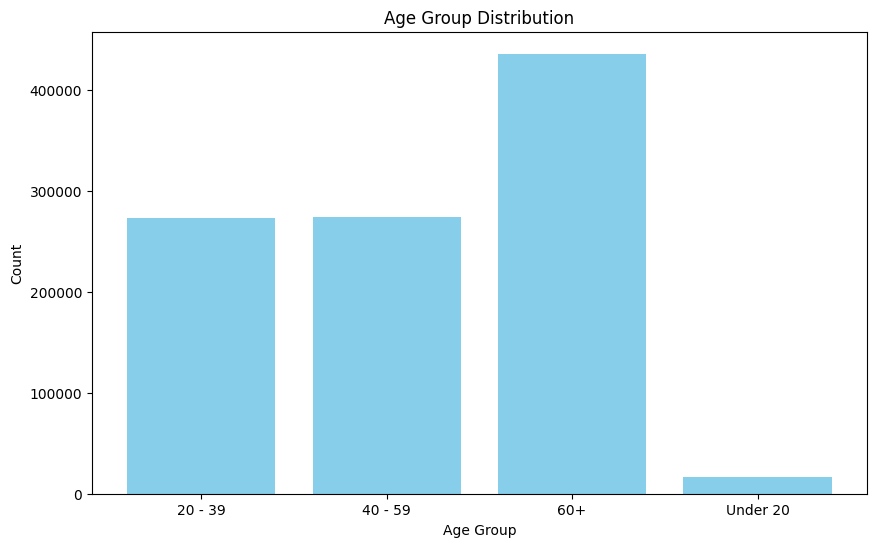

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(age_counts['age_group'], age_counts['count'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

In [34]:
#contagem de pessoas por país

country_counts = df.groupBy('country_name').count().toPandas().sort_values('count', ascending=False).head(10)

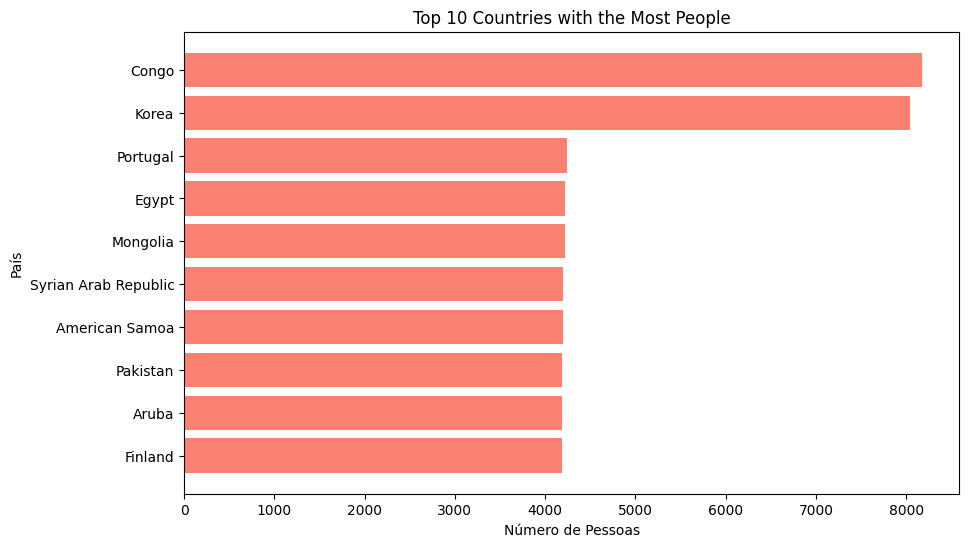

In [36]:
plt.figure(figsize=(10,6))
plt.barh(country_counts['country_name'], country_counts['count'], color='salmon')
plt.title('Top 10 Countries with the Most People')
plt.xlabel('Número de Pessoas')
plt.ylabel('País')
plt.gca().invert_yaxis()
plt.show()

In [40]:
#contagem de pessoas por cidade

city_counts = df.groupBy('city_name').count().toPandas().sort_values('count', ascending=False).head(10)

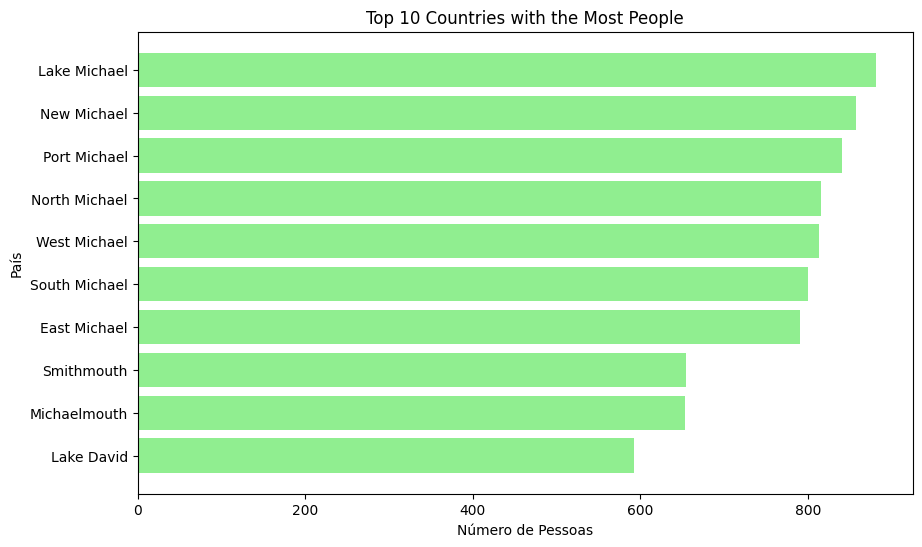

In [42]:
plt.figure(figsize=(10,6))
plt.barh(city_counts['city_name'], city_counts['count'], color='lightgreen')
plt.title('Top 10 Countries with the Most People')
plt.xlabel('Número de Pessoas')
plt.ylabel('País')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
jobs_df = spark.read.parquet('datalake/trusted/jobs')

In [43]:
jobs_df.show(5)

+--------------------+-----+
|                 job|count|
+--------------------+-----+
|    Catering manager| 1609|
|Diplomatic Servic...| 1568|
|Designer, ceramic...| 1562|
| Retail merchandiser| 1530|
| Librarian, academic| 1539|
+--------------------+-----+
only showing top 5 rows



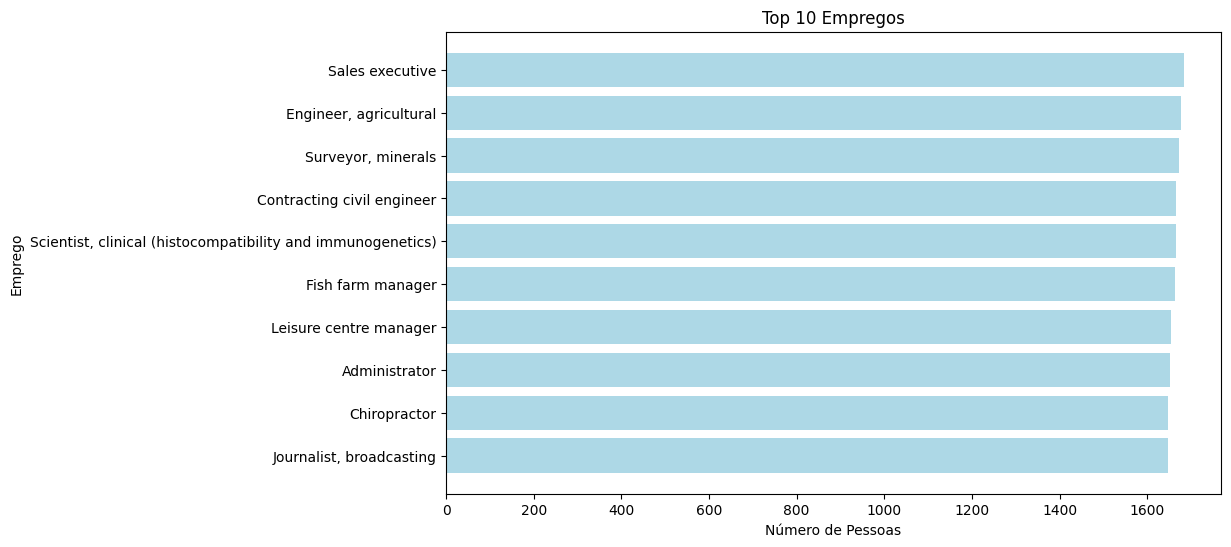

In [45]:
jobs_counts = jobs_df.toPandas().sort_values('count', ascending=False).head(10)



plt.figure(figsize=(10,6))
plt.barh(jobs_counts['job'], jobs_counts['count'], color='lightblue')
plt.title('Top 10 Empregos')
plt.xlabel('Número de Pessoas')
plt.ylabel('Emprego')
plt.gca().invert_yaxis()
plt.show()